In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow.keras import models,layers

In [2]:
(training_images, training_labels), (testing_images, testing_labels) = cifar10.load_data()
training_images, testing_images = training_images / 255.0, testing_images / 255.0
training_labels, testing_labels = to_categorical(training_labels), to_categorical(testing_labels)

In [3]:
class_names = ["Airplane", "Automobile", "Bird", "Cat", "Deer", "Dog", "Frog", "Horse", "Ship", "Truck"]

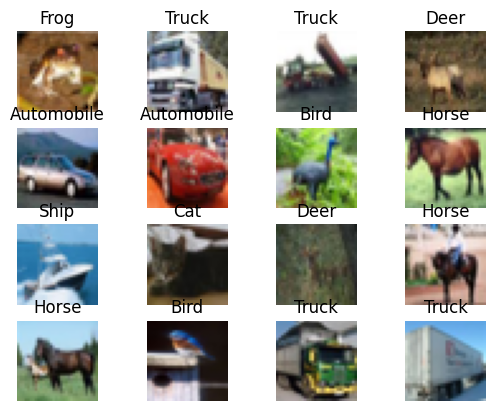

In [4]:
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(training_images[i])
    plt.title(class_names[tf.argmax(training_labels[i])])
    plt.axis('off')
plt.show()

In [5]:
subset_size = 20000  # Choose the desired subset size
training_images = training_images[:subset_size]
training_labels = training_labels[:subset_size]
subset_size_test = 4000  # Choose the desired subset size for testing
testing_images = testing_images[:subset_size_test]
testing_labels = testing_labels[:subset_size_test]

In [6]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

C:\Users\KIIT\Documents\minorproject\project\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [7]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
model.fit(training_images, training_labels, epochs=10, validation_data=(testing_images, testing_labels))

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.2520 - loss: 1.9899 - val_accuracy: 0.4733 - val_loss: 1.4543
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.4865 - loss: 1.4347 - val_accuracy: 0.5200 - val_loss: 1.3484
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.5513 - loss: 1.2618 - val_accuracy: 0.5623 - val_loss: 1.2137
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.5916 - loss: 1.1561 - val_accuracy: 0.5990 - val_loss: 1.1466
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.6243 - loss: 1.0468 - val_accuracy: 0.5925 - val_loss: 1.1861
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.6577 - loss: 0.9773 - val_accuracy: 0.6100 - val_loss: 1.1398
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.6789 - loss: 0.9083 - val_accuracy: 0.6340 - val_loss: 1.0474
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.7078 - loss: 0.8441 - val_accu

In [9]:
loss,accuracy = model.evaluate(testing_images,testing_labels)
print(f'Loss: {loss}')
print(f"Accuracy: {accuracy}")

125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6455 - loss: 1.0363
Loss: 1.0511486530303955
Accuracy: 0.6417499780654907


In [14]:
model.save('image_classifier.h5')